In [4]:
# Training data
students = {
    'X1': [1.0, 2.0, 3.0, 4.5, 5.0, 5.5, 6.0, 7.0, 8.0, 9.0],  # Hours Studied
    'X2': [5.0, 5.5, 6.0, 5.0, 6.5, 7.0, 6.0, 7.0, 6.0, 7.5],  # Sleep Hours
    'Y':  [0,   0,   0,   0,   1,   1,   1,   1,   1,   1]      # Pass/Fail
}

# New student
new_student = {'X1': 4.0, 'X2': 6.0}

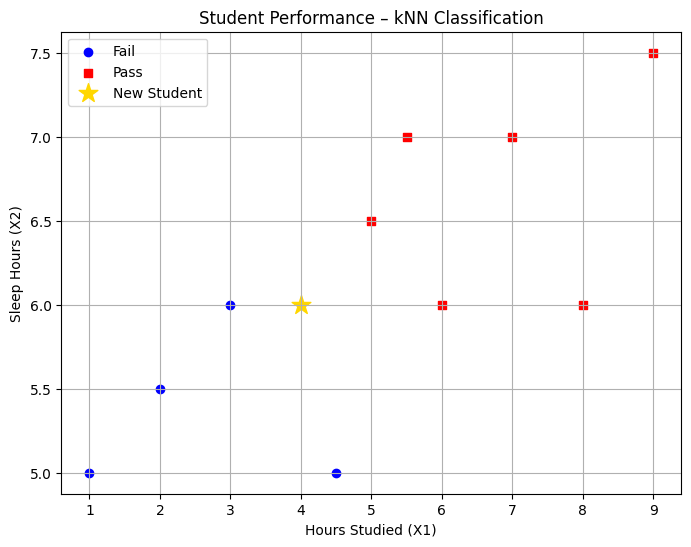

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot training data
for i in range(len(students['Y'])):
    if students['Y'][i] == 0:
        plt.scatter(students['X1'][i], students['X2'][i], marker='o', color='blue', label='Fail' if i == 0 else "")
    else:
        plt.scatter(students['X1'][i], students['X2'][i], marker='s', color='red', label='Pass' if i == 4 else "")

# Plot new student
plt.scatter(new_student['X1'], new_student['X2'], marker='*', color='gold', s=200, label='New Student')

plt.xlabel('Hours Studied (X1)')
plt.ylabel('Sleep Hours (X2)')
plt.title('Student Performance – kNN Classification')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import math

def euclidean(x1, y1, x2, y2):
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2), 2)

distances = []
for i in range(len(students['X1'])):
    dist = euclidean(new_student['X1'], new_student['X2'], students['X1'][i], students['X2'][i])
    distances.append(dist)

# Display results
for i in range(10):
    print(f"Student {i+1}: Studied={students['X1'][i]}, Slept={students['X2'][i]}, Result={students['Y'][i]}, Distance={distances[i]}")

Student 1: Studied=1.0, Slept=5.0, Result=0, Distance=3.16
Student 2: Studied=2.0, Slept=5.5, Result=0, Distance=2.06
Student 3: Studied=3.0, Slept=6.0, Result=0, Distance=1.0
Student 4: Studied=4.5, Slept=5.0, Result=0, Distance=1.12
Student 5: Studied=5.0, Slept=6.5, Result=1, Distance=1.12
Student 6: Studied=5.5, Slept=7.0, Result=1, Distance=1.8
Student 7: Studied=6.0, Slept=6.0, Result=1, Distance=2.0
Student 8: Studied=7.0, Slept=7.0, Result=1, Distance=3.16
Student 9: Studied=8.0, Slept=6.0, Result=1, Distance=4.0
Student 10: Studied=9.0, Slept=7.5, Result=1, Distance=5.22


In [10]:
# Combine data
data = []
for i in range(10):
    data.append({
        'Student': i+1,
        'X1': students['X1'][i],
        'X2': students['X2'][i],
        'Y': students['Y'][i],
        'Distance': distances[i]
    })

# Sort by distance
sorted_data = sorted(data, key=lambda x: x['Distance'])

# Get top 3
nearest = sorted_data[:3]
print("\n3 Nearest Neighbors:")
for n in nearest:
    print(n)

# Majority vote
results = [n['Y'] for n in nearest]
prediction = 1 if results.count(1) > results.count(0) else 0
print(f"\nPrediction for new student: {'Pass' if prediction == 1 else 'Fail'}")


3 Nearest Neighbors:
{'Student': 3, 'X1': 3.0, 'X2': 6.0, 'Y': 0, 'Distance': 1.0}
{'Student': 4, 'X1': 4.5, 'X2': 5.0, 'Y': 0, 'Distance': 1.12}
{'Student': 5, 'X1': 5.0, 'X2': 6.5, 'Y': 1, 'Distance': 1.12}

Prediction for new student: Fail
